In [24]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

import datetime as dt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import seaborn as sns

plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)

In [29]:
df = pd.read_table("train.tsv")
df['datetime'] = pd.to_datetime(df['datetime'])
#df.set_index("datetime", inplace=True)

le = preprocessing.LabelEncoder()
le.fit(df["park"])
df["park"] = le.transform(df["park"])
df.head()

,datetime,park,visitors
0,2015-01-01,5,11028
1,2015-01-01,1,34757
2,2015-01-01,4,29714
3,2015-01-01,0,42652
4,2015-01-01,2,3637


In [30]:
df2 = pd.pivot_table(df,
                     index=['datetime'], 
                     columns=["park"],
                     values=["visitors"],
                     fill_value=0) 
df2.head()


visitors                                             
park              0      1     2    3      4      5     6      7
datetime                                                        
2015-01-01    42652  34757  3637  151  29714  11028  1369  35352
2015-01-02    47035  33795  3244  657  27011  11153  1643  29856
2015-01-03    45368  17114  1927  126  22247  12343   967  27027
2015-01-04    34960   9306   880   75  12236   6732   324  12993
2015-01-05    17740   4732   135    0   6571   4877   100   8112

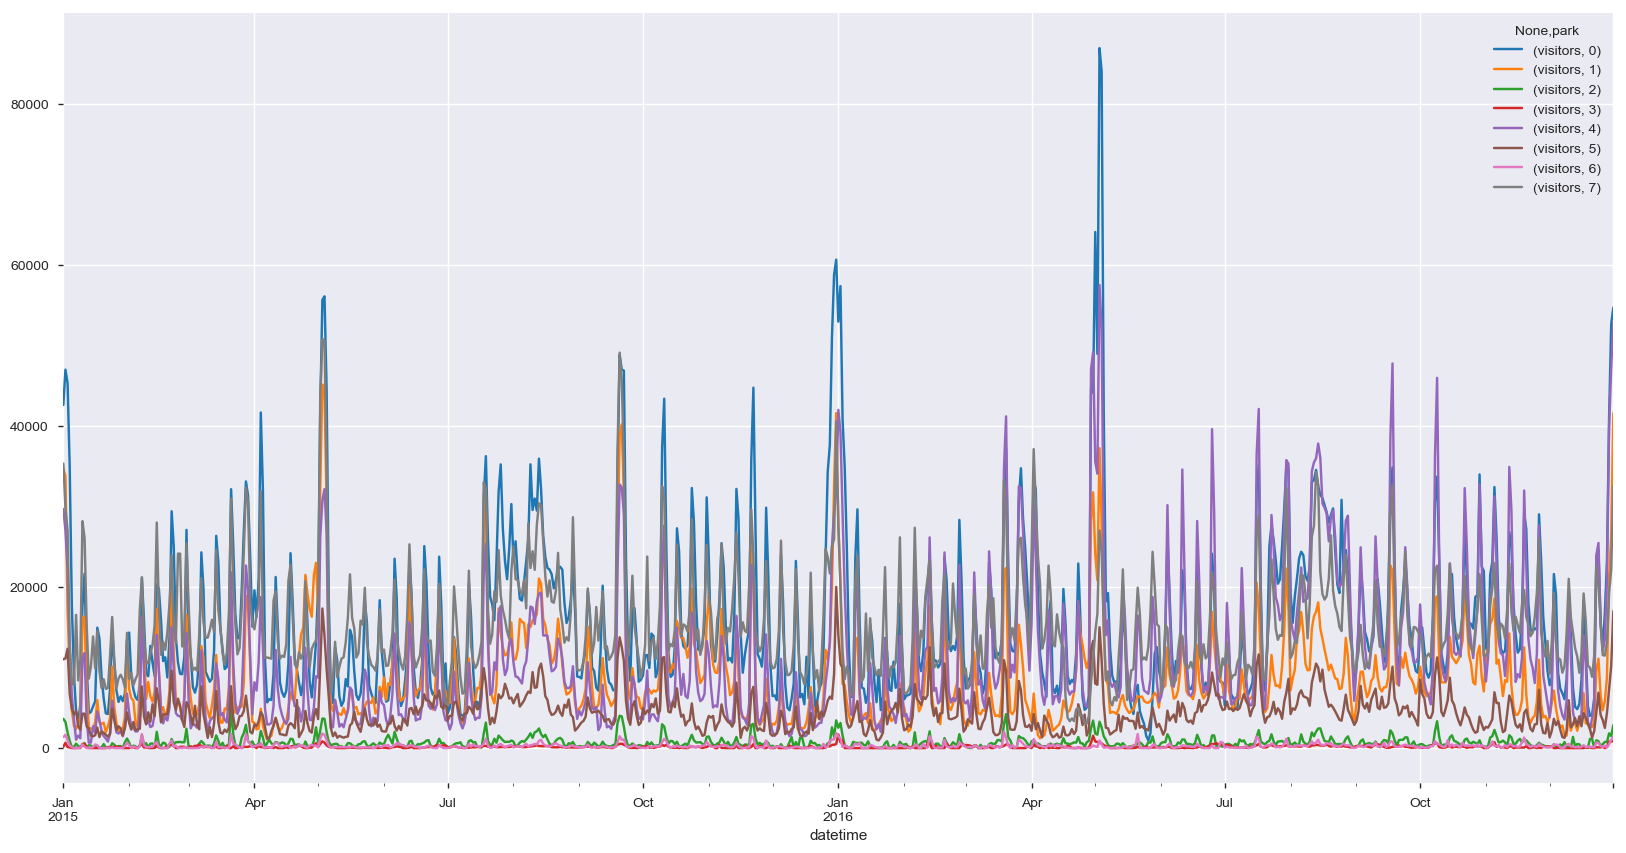

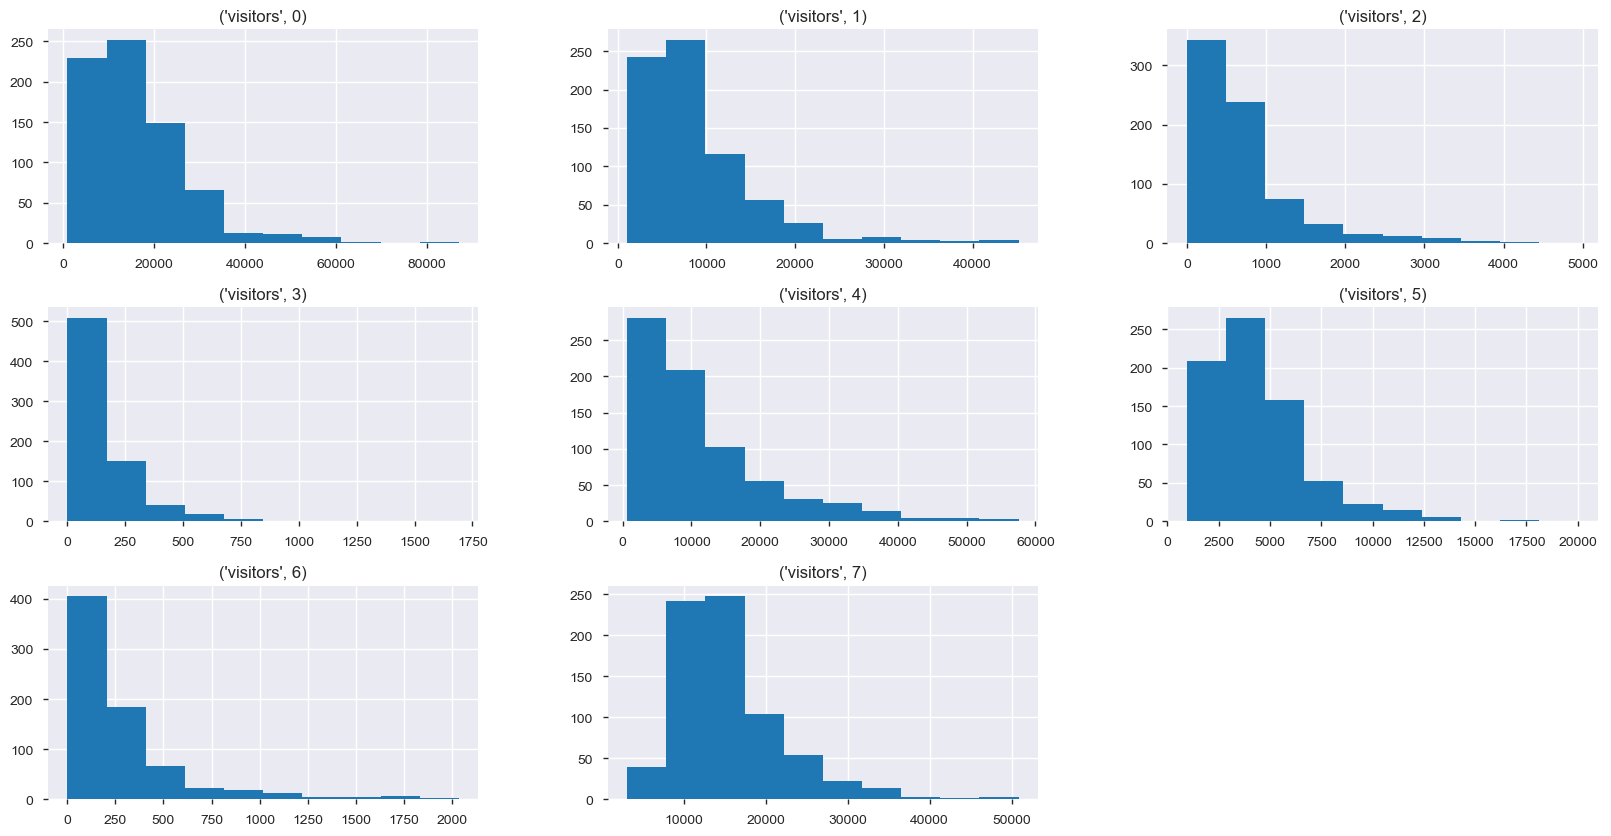

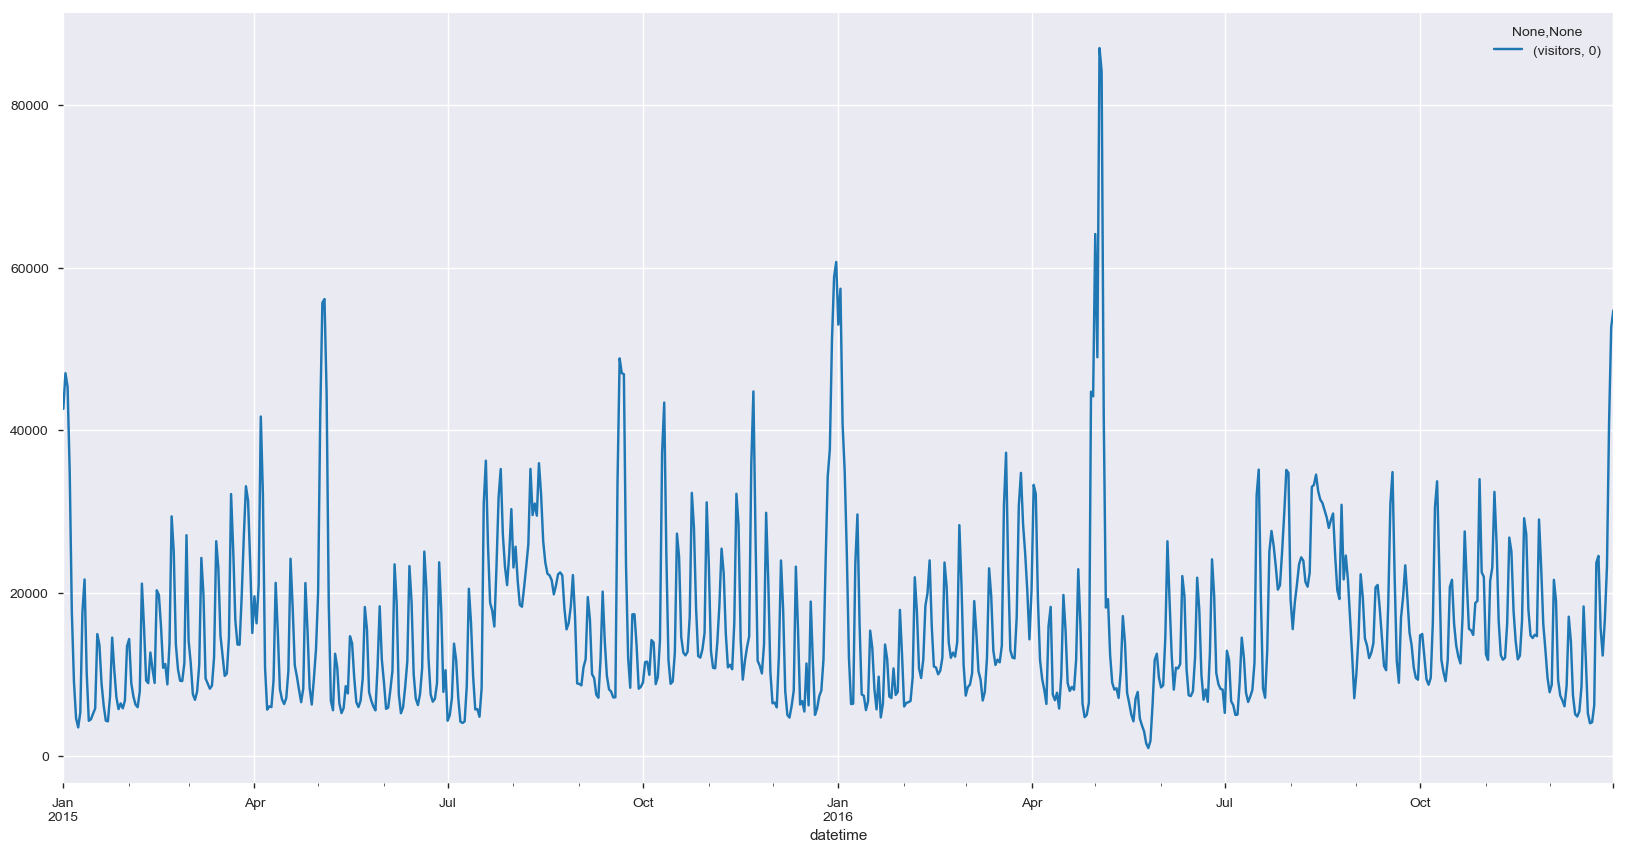

In [42]:
df2.plot.line(figsize=(20,10))
df2.hist(figsize=(20,10))
df2.plot.line(y=("visitors",0),figsize=(20,10))

In [43]:
import pandas_profiling as pdp
pdp.ProfileReport(df2)

Number of variables,9
Number of observations,731
Total Missing (%),0.0%
Total size in memory,51.5 KiB
Average record size in memory,72.1 B
Numeric,8
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0
